##Application Of QC

In [ ]:
!pip install pennylane

     |████████████████████████████████| 409kB 5.6MB/s 
  Created wheel for pennylane: filename=PennyLane-0.14.1-cp37-none-any.whl size=481980 sha256=6f72245f3651d1ed40efa47fc352d30627c2df2bd4f6b9a7cbd3a93319ba1db9
  Stored in directory: /root/.cache/pip/wheels/6e/a9/c9/04941d6dd58b3c111cbd1389bf63ba1b23362c137359af4626
Successfully built pennylane


# __Machine Learning__

The task at hand is to optimize two rotation gates in order to flip a single
qubit from state $\left|0\right\rangle$ to state $\left|1\right\rangle$.

Breaking this down step-by-step, we first start with a qubit in the ground state
$|0\rangle = \begin{bmatrix}1 & 0 \end{bmatrix}^T$,
and rotate it around the x-axis by applying the gate

\begin{align}R_x(\phi_1) = e^{-i \phi_1 \sigma_x /2} =
    \begin{bmatrix} \cos \frac{\phi_1}{2} &  -i \sin \frac{\phi_1}{2} \\
                   -i \sin \frac{\phi_1}{2} &  \cos \frac{\phi_1}{2}
    \end{bmatrix},\end{align}

and then around the y-axis via the gate

\begin{align}R_y(\phi_2) = e^{-i \phi_2 \sigma_y/2} =
   \begin{bmatrix} \cos \frac{\phi_2}{2} &  - \sin \frac{\phi_2}{2} \\
                   \sin \frac{\phi_2}{2} &  \cos \frac{\phi_2}{2}
   \end{bmatrix}.\end{align}

After these operations the qubit is now in the state

\begin{align}| \psi \rangle = R_y(\phi_2) R_x(\phi_1) | 0 \rangle.\end{align}

Finally, we measure the expectation value $\langle \psi \mid \sigma_z \mid \psi \rangle$
of the Pauli-Z operator

\begin{align}\sigma_z =
   \begin{bmatrix} 1 &  0 \\
                   0 & -1
   \end{bmatrix}.\end{align}

Using the above to calculate the exact expectation value, we find that

\begin{align}\langle \psi \mid \sigma_z \mid \psi \rangle
    = \langle 0 \mid R_x(\phi_1)^\dagger R_y(\phi_2)^\dagger \sigma_z  R_y(\phi_2) R_x(\phi_1) \mid 0 \rangle
    = \cos(\phi_1)\cos(\phi_2).\end{align}

Depending on the circuit parameters $\phi_1$ and $\phi_2$, the
output expectation lies between $1$ (if $\left|\psi\right\rangle = \left|0\right\rangle$)
and $-1$ (if $\left|\psi\right\rangle = \left|1\right\rangle$).

In [ ]:
import pennylane as qml
from pennylane import numpy as np

Creating a device

In [ ]:
dev1 = qml.device("default.qubit", wires=1)

Constructing the QNode

In [ ]:
@qml.qnode(dev1)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    return qml.expval(qml.PauliZ(0))

In [ ]:
print(circuit([0.54, 0.12]))

0.8515405859048366


Calculating quantum gradients

In [ ]:
dcircuit = qml.grad(circuit, argnum=0)

print(dcircuit([0.54, 0.12]))

[array(-0.51043865), array(-0.1026782)]


Optimization

In [ ]:
def cost(x):
    return circuit(x)

In [ ]:
init_params = np.array([0.011, 0.012])
print(cost(init_params))

0.9998675058299389


In [ ]:
# initialise the optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.4)

# set the number of steps
steps = 100
# set the initial parameter values
params = init_params

for i in range(steps):
    # update the circuit parameters
    params = opt.step(cost, params)

    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

print("Optimized rotation angles: {}".format(params))

Cost after step     5:  0.9961778
Cost after step    10:  0.8974944
Cost after step    15:  0.1440490
Cost after step    20: -0.1536720
Cost after step    25: -0.9152496
Cost after step    30: -0.9994046
Cost after step    35: -0.9999964
Cost after step    40: -1.0000000
Cost after step    45: -1.0000000
Cost after step    50: -1.0000000
Cost after step    55: -1.0000000
Cost after step    60: -1.0000000
Cost after step    65: -1.0000000
Cost after step    70: -1.0000000
Cost after step    75: -1.0000000
Cost after step    80: -1.0000000
Cost after step    85: -1.0000000
Cost after step    90: -1.0000000
Cost after step    95: -1.0000000
Cost after step   100: -1.0000000
Optimized rotation angles: [7.15266381e-18 3.14159265e+00]


#  __Chemistry__

In [ ]:
!pip install pennylane-qchem

     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 26.0MB 1.5MB/s 
     |████████████████████████████████| 911kB 40.8MB/s 
     |████████████████████████████████| 1.8MB 44.7MB/s 
     |████████████████████████████████| 1.3MB 41.6MB/s 
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-cp37-none-any.whl size=13825 sha256=1514e73c25af61fa95e3210bca4058d5206e7bebec19e9739085156197dca50b
  Stored in directory: /root/.cache/pip/wheels/10/4d/51/6b843681a9a5aef35f0d0fbce243de46f85080036e16118752
Successfully built pubchempy
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


Building the electronic Hamiltonian

In [ ]:
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np

In [ ]:
geometry = 'h2.xyz'

charge = 0

multiplicity = 1

In [ ]:
basis_set = 'sto-3g'

In [ ]:
name = 'h2'

In [ ]:
h, qubits = qchem.molecular_hamiltonian(
    name,
    geometry,
    charge=charge,
    mult=multiplicity,
    basis=basis_set,
    active_electrons=2,
    active_orbitals=2,
    mapping='jordan_wigner'
)

print('Number of qubits = ', qubits)
print('Hamiltonian is ', h)

Number of qubits =  4
Hamiltonian is  (-0.04207897647782276) [I0]
+ (0.17771287465139946) [Z0]
+ (0.1777128746513994) [Z1]
+ (-0.24274280513140462) [Z2]
+ (-0.24274280513140462) [Z3]
+ (0.17059738328801052) [Z0 Z1]
+ (0.04475014401535161) [Y0 X1 X2 Y3]
+ (-0.04475014401535161) [Y0 Y1 X2 X3]
+ (-0.04475014401535161) [X0 X1 Y2 Y3]
+ (0.04475014401535161) [X0 Y1 Y2 X3]
+ (0.12293305056183798) [Z0 Z2]
+ (0.1676831945771896) [Z0 Z3]
+ (0.1676831945771896) [Z1 Z2]
+ (0.12293305056183798) [Z1 Z3]
+ (0.17627640804319591) [Z2 Z3]


Implementing the VQE algorithm

In [ ]:
dev = qml.device('default.qubit', wires=qubits)

In [ ]:
def circuit(params, wires):
    qml.BasisState(np.array([1, 1, 0, 0], requires_grad=False), wires=wires)
    for i in wires:
        qml.Rot(*params[i], wires=i)
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[2, 0])
    qml.CNOT(wires=[3, 1])

In [ ]:
cost_fn = qml.ExpvalCost(circuit, h, dev)

In [ ]:
opt = qml.GradientDescentOptimizer(stepsize=0.4)
np.random.seed(0)
params = np.random.normal(0, np.pi, (qubits, 3))

print(params)

[[ 5.54193389  1.25713095  3.07479606]
 [ 7.03997361  5.86710646 -3.07020901]
 [ 2.98479079 -0.47550269 -0.32427159]
 [ 1.28993324  0.45252622  4.56873497]]


In [ ]:
conv_tol = 1e-06
max_iterations = 200

for n in range(max_iterations):
    params, prev_energy = opt.step_and_cost(cost_fn, params)
    energy = cost_fn(params)
    conv = np.abs(energy - prev_energy)

    if n % 20 == 0:
        print('Iteration = {:},  Energy = {:.8f} Ha'.format(n, energy))

    if conv <= conv_tol:
        break

print()
print('Final convergence parameter = {:.8f} Ha'.format(conv))
print('Final value of the ground-state energy = {:.8f} Ha'.format(energy))
print('Accuracy with respect to the FCI energy: {:.8f} Ha ({:.8f} kcal/mol)'.format(
    np.abs(energy - (-1.136189454088)), np.abs(energy - (-1.136189454088))*627.503
    )
)
print()
print('Final circuit parameters = \n', params)

Iteration = 0,  Energy = -0.88179557 Ha
Iteration = 20,  Energy = -1.13380513 Ha
Iteration = 40,  Energy = -1.13558756 Ha
Iteration = 60,  Energy = -1.13585794 Ha
Iteration = 80,  Energy = -1.13600617 Ha
Iteration = 100,  Energy = -1.13608848 Ha
Iteration = 120,  Energy = -1.13613394 Ha

Final convergence parameter = 0.00000099 Ha
Final value of the ground-state energy = -1.13615709 Ha
Accuracy with respect to the FCI energy: 0.00003237 Ha (0.02031093 kcal/mol)

Final circuit parameters = 
 [[ 5.54193389e+00  1.30219523e-08  3.07479606e+00]
 [ 7.03997361e+00  6.28318530e+00 -3.07020901e+00]
 [ 2.98479079e+00 -2.09540998e-01 -4.16893297e-02]
 [ 1.28993324e+00  1.30907669e-12  4.56873497e+00]]


# __Optimization__

In [ ]:
import pennylane as qml
from pennylane import numpy as np

np.random.seed(42)

In [ ]:
n_wires = 4
graph = [(0, 1), (0, 3), (1, 2), (2, 3)]

# unitary operator U_B with parameter beta
def U_B(beta):
    for wire in range(n_wires):
        qml.RX(2 * beta, wires=wire)


# unitary operator U_C with parameter gamma
def U_C(gamma):
    for edge in graph:
        wire1 = edge[0]
        wire2 = edge[1]
        qml.CNOT(wires=[wire1, wire2])
        qml.RZ(gamma, wires=wire2)
        qml.CNOT(wires=[wire1, wire2])

In [ ]:
def comp_basis_measurement(wires):
    n_wires = len(wires)
    return qml.Hermitian(np.diag(range(2 ** n_wires)), wires=wires)

In [ ]:
dev = qml.device("default.qubit", wires=n_wires, analytic=True, shots=1)


In [ ]:
pauli_z = [[1, 0], [0, -1]]
pauli_z_2 = np.kron(pauli_z, pauli_z)


@qml.qnode(dev)
def circuit(gammas, betas, edge=None, n_layers=1):
    # apply Hadamards to get the n qubit |+> state
    for wire in range(n_wires):
        qml.Hadamard(wires=wire)
    # p instances of unitary operators
    for i in range(n_layers):
        U_C(gammas[i])
        U_B(betas[i])
    if edge is None:
        # measurement phase
        return qml.sample(comp_basis_measurement(range(n_wires)))
    # during the optimization phase we are evaluating a term
    # in the objective using expval
    return qml.expval(qml.Hermitian(pauli_z_2, wires=edge))

In [ ]:
def qaoa_maxcut(n_layers=1):
    print("\np={:d}".format(n_layers))

    # initialize the parameters near zero
    init_params = 0.01 * np.random.rand(2, 2)

    # minimize the negative of the objective function
    def objective(params):
        gammas = params[0]
        betas = params[1]
        neg_obj = 0
        for edge in graph:
            # objective for the MaxCut problem
            neg_obj -= 0.5 * (1 - circuit(gammas, betas, edge=edge, n_layers=n_layers))
        return neg_obj

    # initialize optimizer: Adagrad works well empirically
    opt = qml.AdagradOptimizer(stepsize=0.5)

    # optimize parameters in objective
    params = init_params
    steps = 30
    for i in range(steps):
        params = opt.step(objective, params)
        if (i + 1) % 5 == 0:
            print("Objective after step {:5d}: {: .7f}".format(i + 1, -objective(params)))

    # sample measured bitstrings 100 times
    bit_strings = []
    n_samples = 100
    for i in range(0, n_samples):
        bit_strings.append(int(circuit(params[0], params[1], edge=None, n_layers=n_layers)))

    # print optimal parameters and most frequently sampled bitstring
    counts = np.bincount(np.array(bit_strings))
    most_freq_bit_string = np.argmax(counts)
    print("Optimized (gamma, beta) vectors:\n{}".format(params[:, :n_layers]))
    print("Most frequently sampled bit string is: {:04b}".format(most_freq_bit_string))

    return -objective(params), bit_strings


# perform qaoa on our graph with p=1,2 and
# keep the bitstring sample lists
bitstrings1 = qaoa_maxcut(n_layers=1)[1]
bitstrings2 = qaoa_maxcut(n_layers=2)[1]


p=1
Objective after step     5:  2.7880374
Objective after step    10:  2.9985748
Objective after step    15:  2.9999911
Objective after step    20:  2.9999999
Objective after step    25:  3.0000000
Objective after step    30:  3.0000000
Optimized (gamma, beta) vectors:
[[-0.78539816]
 [-1.17809777]]
Most frequently sampled bit string is: 0101

p=2
Objective after step     5:  3.1570925
Objective after step    10:  3.3870161
Objective after step    15:  3.8427178
Objective after step    20:  3.9902061
Objective after step    25:  3.9995094
Objective after step    30:  3.9999765
Optimized (gamma, beta) vectors:
[[ 1.56868319 -0.78401189]
 [-1.17856453 -0.78638292]]
Most frequently sampled bit string is: 1010


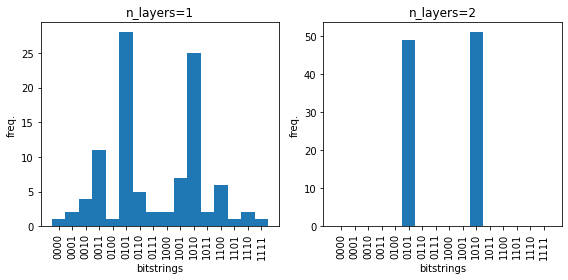

In [ ]:
import matplotlib.pyplot as plt

xticks = range(0, 16)
xtick_labels = list(map(lambda x: format(x, "04b"), xticks))
bins = np.arange(0, 17) - 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("n_layers=1")
plt.xlabel("bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings1, bins=bins)
plt.subplot(1, 2, 2)
plt.title("n_layers=2")
plt.xlabel("bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings2, bins=bins)
plt.tight_layout()
plt.show()